# Analytics Module
The Analytics module provides descriptive statistics on content data, evidence data and model evaluations 

In [1]:
# reloads modules automatically before entering the execution of code

%load_ext autoreload
%autoreload 2

# third parties imports
import numpy as np 
import pandas as pd

# -- add new imports here --
import matplotlib.pyplot as plt
from collections import Counter

# local imports
from constants import Constant as C
from loaders import load_ratings
from loaders import load_items

           action  adventure  animation  children    comedy    crime  \
movieId                                                                
1        0.000000   0.409953   0.532782  0.495334  0.267377  0.00000   
2        0.000000   0.510589   0.000000  0.616929  0.000000  0.00000   
3        0.000000   0.000000   0.000000  0.000000  0.587560  0.00000   
4        0.000000   0.000000   0.000000  0.000000  0.523855  0.00000   
5        0.000000   0.000000   0.000000  0.000000  1.000000  0.00000   
...           ...        ...        ...       ...       ...      ...   
161582   0.000000   0.000000   0.000000  0.000000  0.000000  0.87227   
161594   0.324133   0.361472   0.469775  0.000000  0.000000  0.00000   
161918   0.384347   0.428622   0.000000  0.000000  0.000000  0.00000   
163056   0.377365   0.420836   0.000000  0.000000  0.000000  0.00000   
163949   0.000000   0.000000   0.000000  0.000000  0.000000  0.00000   

         documentary     drama   fantasy        fi  ...  listed

# 1 - Content analytics
Explore and perform descriptive statistics on content data

In [2]:
# -- load the items and display the Dataframe
df_items = load_items()
display(df_items)

,title,genres,year
movieId,,,
1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",1995
2,Jumanji (1995),"[Adventure, Children, Fantasy]",1995
3,Grumpier Old Men (1995),"[Comedy, Romance]",1995
4,Waiting to Exhale (1995),"[Comedy, Drama, Romance]",1995
5,Father of the Bride Part II (1995),[Comedy],1995
...,...,...,...
161582,Hell or High Water (2016),"[Crime, Drama]",2016
161594,Kingsglaive: Final Fantasy XV (2016),"[Action, Adventure, Animation, Drama, Fantasy,...",2016
161918,Sharknado 4: The 4th Awakens (2016),"[Action, Adventure, Horror, Sci-Fi]",2016


In [3]:
# -- display relevant informations that can be extracted from the dataset
n_movies = len(df_items)
print(f"Number of movies: {n_movies}")
df_items['year'] = df_items[C.LABEL_COL].str.extract(r"\((\d{4})\)")
df_items['year'] = pd.to_numeric(df_items['year'], errors='coerce').astype('Int64')
print(f"Year range : from {df_items['year'].min()} to {df_items['year'].max()}")

Number of movies: 8737
Year range : from 1902 to 2016


# 2 - Evidence analytics
Explore and perform descriptive statistics on evidence data

In [4]:
# -- load the items and display the Dataframe
df_ratings = load_ratings()
display(df_ratings)

,userId,movieId,rating
0,277,6,5.0
1,277,7,5.0
2,277,10,3.0
3,277,16,5.0
4,277,18,3.0
...,...,...,...
381176,283184,5553,2.0
381177,283184,5673,5.0
381178,283184,5689,3.0
381179,283184,5902,5.0


In [5]:

genre_frequency = Counter(g for genres in df_items[C.GENRES_COL] for g in genres)

print(f"There are {len(genre_frequency)} genres.")

display(genre_frequency)

# -- display relevant informations that can be extracted from the dataset

n_ratings = len(df_ratings)
print(f'Number of ratings : {n_ratings}')

unique_users = len(pd.unique(df_ratings[C.USER_ID_COL]))
print(f'Number of users : {unique_users}')

unique_movies = len(pd.unique(df_ratings[C.ITEM_ID_COL]))
print(f'Number of movies : {unique_movies}')


ratings_matrix = df_ratings.pivot(index=C.USER_ID_COL, columns=C.ITEM_ID_COL, values=C.RATING_COL)
display(ratings_matrix)

unique_movies_matrix = len(ratings_matrix.columns)
print(f'Number of movies in the ratings matrix : {unique_movies_matrix}')

joined_df = df_ratings.join(df_items, C.ITEM_ID_COL, 'right').groupby([C.LABEL_COL]).agg({C.RATING_COL : ['count'] })

print('10 most rated movies : ')
print('')
display(joined_df.sort_values([(C.RATING_COL, 'count')], ascending=False).head(10))

print('10 least rated movies : ')
print('')
display(joined_df.sort_values([(C.RATING_COL, 'count')], ascending=True).head(10))

print('All possible rating values : ')
print('')
rating_values = np.sort(df_ratings[C.RATING_COL].unique())
for i in rating_values :
    print(i)
print('')
print(f"Number of unrated movies: {len(joined_df[joined_df[(C.RATING_COL, 'count')] == 0])}")


There are 20 genres.


Counter({'Drama': 4183,
         'Comedy': 3186,
         'Thriller': 1689,
         'Action': 1500,
         'Romance': 1493,
         'Adventure': 1091,
         'Crime': 1072,
         'Horror': 845,
         'Sci-Fi': 776,
         'Fantasy': 640,
         'Children': 574,
         'Mystery': 532,
         'Documentary': 439,
         'Animation': 433,
         'Musical': 383,
         'War': 359,
         'Western': 163,
         'IMAX': 153,
         'Film-Noir': 132,
         '(no genres listed)': 9})

Number of ratings : 381181
Number of users : 1000
Number of movies : 8737


movieId,1,2,3,4,5,6,7,8,9,10,...,160567,160590,160656,160718,160954,161582,161594,161918,163056,163949
userId,,,,,,,,,,,,,,,,,,,,,
277,NaN,NaN,NaN,NaN,NaN,5.0,5.0,NaN,NaN,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
605,NaN,NaN,3.5,NaN,3.5,NaN,NaN,NaN,NaN,0.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
776,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1010,NaN,NaN,3.0,NaN,2.5,3.5,NaN,NaN,NaN,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1534,NaN,NaN,NaN,NaN,NaN,4.5,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282833,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
283020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
283062,NaN,NaN,NaN,NaN,NaN,3.5,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Number of movies in the ratings matrix : 8737
10 most rated movies : 



,rating
,count
title,
Forrest Gump (1994),837
Pulp Fiction (1994),801
Star Wars: Episode IV - A New Hope (1977),791
"Silence of the Lambs, The (1991)",779
Star Wars: Episode V - The Empire Strikes Back (1980),769
Jurassic Park (1993),761
Back to the Future (1985),742
Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981),734


10 least rated movies : 



,rating
,count
title,
À nous la liberté (Freedom for Us) (1931),1
"Member of the Wedding, The (1952)",1
Cowboy Bebop: The Movie (Cowboy Bebop: Tengoku no Tobira) (2001),1
"Cowboy Way, The (1994)",1
Cowboys & Aliens (2011),1
Melancholia (2011),1
Mediterraneo (1991),1
Medicine Man (1992),1


All possible rating values : 

0.5
1.0
1.5
2.0
2.5
3.0
3.5
4.0
4.5
5.0

Number of unrated movies: 0


# 3 - Long-tail property

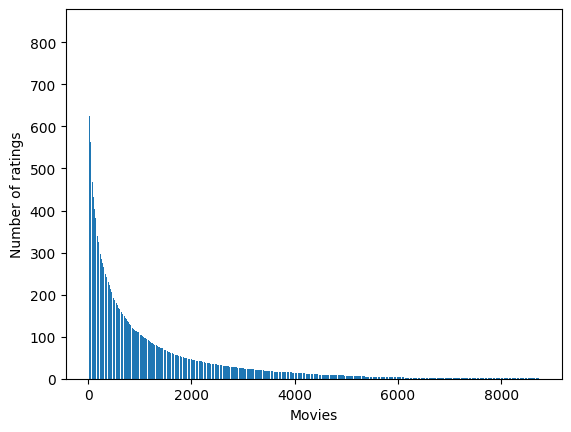

In [6]:
fig, ax = plt.subplots()

X = np.linspace(0, len(joined_df), len(joined_df))
Y = joined_df.sort_values([(C.RATING_COL, 'count')], ascending=False)[(C.RATING_COL, 'count')].to_numpy() 

ax.bar(X, Y)
plt.xlabel('Movies')
plt.ylabel('Number of ratings')
plt.show()

# 4 - Ratings matrix sparsity

movieId,1,2,3,4,5,6,7,8,9,10,...,98,99,100,101,102,103,104,105,107,108
userId,,,,,,,,,,,,,,,,,,,,,
277,NaN,NaN,NaN,NaN,NaN,5.0,5.0,NaN,NaN,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
605,NaN,NaN,3.5,NaN,3.5,NaN,NaN,NaN,NaN,0.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
776,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1010,NaN,NaN,3.0,NaN,2.5,3.5,NaN,NaN,NaN,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1534,NaN,NaN,NaN,NaN,NaN,4.5,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22888,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23591,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24073,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


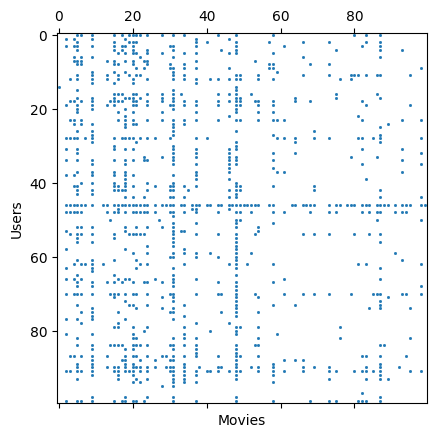

In [7]:
lim_mat = ratings_matrix.iloc[:100, :100]
display(lim_mat)

plt.spy(lim_mat, markersize=1)
plt.xlabel('Movies')
plt.ylabel('Users')
plt.show()